In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA

In [14]:
%matplotlib inline
from skimage.io import imread
from skimage.transform import resize

In [15]:
# load image in structure directory like it's sklearn sample dataset
def load_image_files(container_path,dimension=(64,64)):

    image_dir=Path(container_path)
    folders=[directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories=[fo.name for fo in folders]
    print(categories)
    descr = """description: image classification """

    images=[]
    flat_data=[]
    target=[]
    #print(target)

    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img=imread(file)
            #plt.imshow(img)#original images we have to converting image
            #plt.show()
            img_resized=resize(img,dimension,anti_aliasing=True,mode='reflect')
            plt.imshow(img_resized)#after converting the image
            #plt.show()
            flat_data.append(img_resized.flatten())
            images.append(img_resized)
            target.append(i)
    flat_data=np.array(flat_data)
    target=np.array(target)
    images=np.array(images)
        
    return Bunch(data=flat_data,
                    target=target,
                    target_names=categories,
                    images=images,
                    DESCR=descr)

['dog', 'flowers', 'cat']


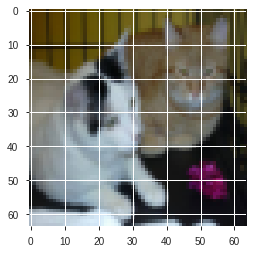

In [20]:
from pathlib import Path
from sklearn.utils import Bunch
import skimage
image_dataset=load_image_files("/home/manikanta/Documents/ML/classification/KNN/image")

In [21]:
image_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [22]:
image_dataset.data

array([[0.25257353, 0.68002451, 0.6564951 , ..., 0.64770508, 0.6382688 ,
        0.5372549 ],
       [0.28400735, 0.31145833, 0.14515931, ..., 0.82359069, 0.81047986,
        0.75851716],
       [0.31244638, 0.20264246, 0.15558364, ..., 0.44339001, 0.30272672,
        0.20174632],
       ...,
       [0.38823529, 0.29803922, 0.27616422, ..., 0.51010838, 0.54240196,
        0.52414024],
       [0.23921569, 0.21960784, 0.14117647, ..., 0.63137255, 0.59965437,
        0.42745098],
       [0.22349877, 0.14025735, 0.01568627, ..., 0.05490196, 0.05490196,
        0.07058824]])

In [23]:
image_dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
df=pd.DataFrame(image_dataset.data)

In [25]:
df

,0,1,2,3,4,5,6,7,8,9,...,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287
0,0.252574,0.680025,0.656495,0.247619,0.675070,0.651540,0.243137,0.670588,0.650980,0.242433,...,0.580811,0.667631,0.639216,0.564706,0.645680,0.624562,0.553156,0.647705,0.638269,0.537255
1,0.284007,0.311458,0.145159,0.288787,0.319301,0.135484,0.307466,0.324877,0.155208,0.204460,...,0.744669,0.844740,0.832975,0.793689,0.829963,0.818199,0.771998,0.823591,0.810480,0.758517
2,0.312446,0.202642,0.155584,0.281457,0.171653,0.124594,0.283035,0.165686,0.122549,0.307927,...,0.155025,0.334344,0.238779,0.171262,0.424502,0.286612,0.207498,0.443390,0.302727,0.201746
3,0.610815,0.581594,0.506556,0.662511,0.634416,0.549295,0.636155,0.552145,0.519730,0.692310,...,0.914737,0.489152,0.672733,0.859862,0.418045,0.634344,0.805841,0.523138,0.794332,0.922917
4,0.823190,0.799660,0.815347,0.819608,0.792157,0.808172,0.827451,0.788235,0.809528,0.840545,...,0.451838,0.605576,0.425214,0.448744,0.582843,0.417808,0.437745,0.541174,0.383640,0.403248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0.323100,0.312653,0.206587,0.272120,0.167433,0.146354,0.483333,0.428554,0.426838,0.611152,...,0.375858,0.387469,0.360570,0.377114,0.360325,0.337500,0.344822,0.384314,0.345098,0.357475
161,0.835189,0.784208,0.721463,0.831373,0.780392,0.717647,0.835294,0.784314,0.721569,0.835294,...,0.997580,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078
162,0.388235,0.298039,0.276164,0.404779,0.299694,0.283573,0.443260,0.323346,0.313777,0.462132,...,0.250980,0.260068,0.305473,0.309988,0.347922,0.389767,0.370655,0.510108,0.542402,0.524140
163,0.239216,0.219608,0.141176,0.239216,0.219608,0.141176,0.239216,0.230790,0.148438,0.239216,...,0.380271,0.627328,0.599877,0.395833,0.643137,0.611765,0.418877,0.631373,0.599654,0.427451


In [26]:
df['target']=image_dataset.target

In [27]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,target
0,0.252574,0.680025,0.656495,0.247619,0.675070,0.651540,0.243137,0.670588,0.650980,0.242433,...,0.667631,0.639216,0.564706,0.645680,0.624562,0.553156,0.647705,0.638269,0.537255,0
1,0.284007,0.311458,0.145159,0.288787,0.319301,0.135484,0.307466,0.324877,0.155208,0.204460,...,0.844740,0.832975,0.793689,0.829963,0.818199,0.771998,0.823591,0.810480,0.758517,0
2,0.312446,0.202642,0.155584,0.281457,0.171653,0.124594,0.283035,0.165686,0.122549,0.307927,...,0.334344,0.238779,0.171262,0.424502,0.286612,0.207498,0.443390,0.302727,0.201746,0
3,0.610815,0.581594,0.506556,0.662511,0.634416,0.549295,0.636155,0.552145,0.519730,0.692310,...,0.489152,0.672733,0.859862,0.418045,0.634344,0.805841,0.523138,0.794332,0.922917,0
4,0.823190,0.799660,0.815347,0.819608,0.792157,0.808172,0.827451,0.788235,0.809528,0.840545,...,0.605576,0.425214,0.448744,0.582843,0.417808,0.437745,0.541174,0.383640,0.403248,0


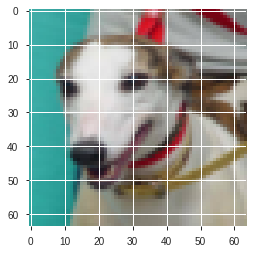

In [28]:
plt.imshow(image_dataset.images[0])

In [29]:
image_dataset.images[0].shape

(64, 64, 3)

In [30]:
image_dataset.data.shape

(165, 12288)

In [32]:
#n_componet=0.80 it will return the eigen vectors that have 80% variance in the datasetf
img_pca=PCA(n_components=0.8)

In [33]:
img_pca.fit(image_dataset.data)

PCA(copy=True, iterated_power='auto', n_components=0.8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [34]:
img_pca.components_.shape

(27, 12288)

In [35]:
componets=img_pca.transform(image_dataset.data)
componets.shape

(165, 27)

In [36]:
componets

array([[  4.21592176,  -7.47210889,  -7.41311109, ...,   0.09261078,
         -2.09855077,   2.51107099],
       [ 13.55414031, -16.71434169,  -1.09160407, ...,   1.86521205,
          1.53683734,  -0.40664008],
       [-20.52127221,   9.39365749,  -4.17304004, ...,   1.38279714,
          1.10100835,  -1.73638848],
       ...,
       [  9.23887709,  -3.26257416,  -6.24488619, ...,   0.84338647,
          4.36656176,  -1.99268481],
       [ -4.65253257, -15.02720171,   9.03239405, ...,   0.5522416 ,
         -0.58443848,   1.19722982],
       [-14.10732395,  -5.70572405,  -5.39311173, ...,  -0.32201177,
          1.5400608 ,   3.21106326]])

In [37]:
projection=img_pca.inverse_transform(componets)
projection.shape

(165, 12288)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

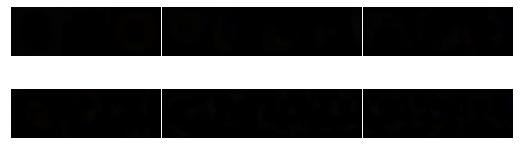

In [42]:
fig,axes=plt.subplots(2,10,
                     figsize=(9,3),subplot_kw={'xticks':[],'yticks':[]},
                    gridspec_kw=dict(hspace=0.01,wspace=0.01))
for i,ax in enumerate(axes.flat):
    ax.imshow(img_pca.components_[i].reshape(64,64,3))